Start script
Type the name of fasta file seq2.fasta
Type the minimal protein length 10
Do you want to have a codon log file? [y]/[n] y
Do you want to see a prot histogram visualization? [y]/[n] y
Type the bin size for protein histogram 10
Iteration 0
Iteration 1
Iteration 2
Iteration 0
Iteration -1
Iteration -2

Basic information about the sequence...

Nucleotide composition:
A 742
G 862
C 776
T 770

Codone composition:
UUU 239
UUC 270
UUA 174
UUG 203
UCU 148
UCC 161
UCA 139
UCG 158
UAU 220
UAC 118
UAA 0
UAG 0
UGU 49
UGC 153
UGA 0
UGG 106
CUU 103
CUC 199
CUA 83
CUG 662
CCU 70
CCC 72
CCA 39
CCG 295
CAU 121
CAC 80
CAA 143
CAG 221
CGU 267
CGC 302
CGA 56
CGG 96
AUU 373
AUC 205
AUA 40
AUG 398
ACU 77
ACC 288
ACA 14
ACG 131
AAU 353
AAC 240
AAA 333
AAG 205
AGU 98
AGC 110
AGA 23
AGG 38
GUU 325
GUC 243
GUA 113
GUG 424
GCU 285
GCC 408
GCA 145
GCG 420
GAU 471
GAC 204
GAA 559
GAG 202
GGU 338
GGC 332
GGA 165
GGG 98

It has been found 101 proteins
There were 72 proteins with min length 30

Protein le

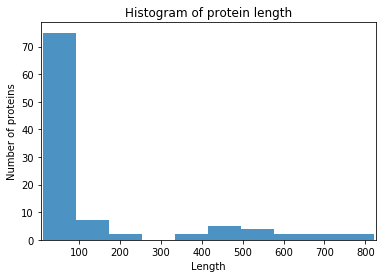


Done


In [3]:
import sys
import numpy
import math
import datetime

print("Start script")
try:
    file = str(input("Type the name of fasta file "))
except IOError:
    print ("Wrong file name!")

minimal_len_prot = int(input("Type the minimal protein length "))  # start parameters
minimal_len_prot = minimal_len_prot * 3
codone_log_button = str(input("Do you want to have a codon log file? [y]/[n] "))
hist = str(input("Do you want to see a prot histogram visualization? [y]/[n] "))
bin_size = int(input("Type the bin size for protein histogram "))

code_calc = {"UUU": 0, "UUC": 0, "UUA": 0, "UUG": 0,
    "UCU": 0, "UCC": 0, "UCA": 0, "UCG": 0,
    "UAU": 0, "UAC": 0, "UAA": 0, "UAG": 0,
    "UGU": 0, "UGC": 0, "UGA": 0, "UGG": 0,
    "CUU": 0, "CUC": 0, "CUA": 0, "CUG": 0,
    "CCU": 0, "CCC": 0, "CCA": 0, "CCG": 0,
    "CAU": 0, "CAC": 0, "CAA": 0, "CAG": 0,
    "CGU": 0, "CGC": 0, "CGA": 0, "CGG": 0,
    "AUU": 0, "AUC": 0, "AUA": 0, "AUG": 0,
    "ACU": 0, "ACC": 0, "ACA": 0, "ACG": 0,
    "AAU": 0, "AAC": 0, "AAA": 0, "AAG": 0,
    "AGU": 0, "AGC": 0, "AGA": 0, "AGG": 0,
    "GUU": 0, "GUC": 0, "GUA": 0, "GUG": 0,
    "GCU": 0, "GCC": 0, "GCA": 0, "GCG": 0,
    "GAU": 0, "GAC": 0, "GAA": 0, "GAG": 0,
    "GGU": 0, "GGC": 0, "GGA": 0, "GGG": 0}

log_file = open("log.txt", "w")
def log_wrapper(name):
    def real_decorator(func):
        def decorated_func(*args, **kwargs):
            now = datetime.datetime.now()
            log_file.write("{}, Date: {}, Function started".format(name, now) + "\n")
            result = func(*args, **kwargs)
            now = datetime.datetime.now()
            log_file.write("{}, Date: {}, Function ended".format(name, now) + "\n")
            return result
        return decorated_func
    return real_decorator


@log_wrapper("orf_finder log")
def orf_finder(sequence, frame):
    stop_codons = ['TGA', 'TAG', 'TAA']
    start_codon = ['ATG']
    start_positions = []
    stop_positions = []
    position_dict = {}
    orffound = {}
    for i in range(frame, len(sequence), 3):  # spliting the seq
        codon = sequence[i:(i + 3)].upper()
        if codon in start_codon:  # checking for start\end
            start_positions += str(i+1).splitlines()
        if codon in stop_codons:
            stop_positions += str(i+1).splitlines()

    if len(start_positions) >= 1 and len(stop_positions) >= 1:
        counter = 0
        delta = 0
        for position_start in start_positions:  # making the dict of orfs
            for position_stop in stop_positions:
                delta = int(position_stop) - int(position_start)
                if delta > 0:
                    nameorf = "orf" + str(counter)
                    counter += 1
                    orffound[nameorf] = position_start, position_stop
                    break
                else:
                    pass
    return orffound


@log_wrapper("module_fasta_writer log")
def module_fasta_writer(out_file, line):  # writes in fasta format by 60 nums in each line
    start_point = 0
    end_point = 60
    if len(line) > 60:
        len_line = len(line)
        while len_line > 0:
            j = line[start_point:end_point]
            len_line = len_line - 60
            out_file.write(j + "\n")
            start_point = start_point + 60
            end_point = end_point + 60
    else:
        out_file.write(line + "\n")


@log_wrapper("protein_translator log")
def protein_translator(line_in, codone_log_button = "y", code_calc = code_calc):
    code = {"UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "UAU": "Y", "UAC": "Y", "UAA": "STOP", "UAG": "STOP",
    "UGU": "C", "UGC": "C", "UGA": "STOP", "UGG": "W",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G",
    "AAN": "!", "AUN": "!", "ACN": "!", "AGN": "!",
    "UAN": "!", "UAN": "!", "UAN": "!", "UAN": "!",
    "GAN": "!", "GAN": "!", "GAN": "!", "GAN": "!",
    "CAN": "!", "CAN": "!", "CAN": "!", "CAN": "!",
    "ANN": "!", "UNN": "!", "GNN": "!", "CNN": "!"}
    

    line_in = line_in.replace('T', 'U')
    line_out = []
    amino_info_collector = {}

    if len(line_in) % 3 == 0:
        for i in range(0, len(line_in), 3):

            codon = line_in[i:(i + 3)]
            if codon in code_calc.keys():
                code_calc[codon] = int(code_calc[codon]) + 1

            ama = code[codon]
            line_out = line_out + list(ama)
            if ama in amino_info_collector.keys():
                amino_info_collector[ama] = int(amino_info_collector[ama]) + 1
            else:
                amino_info_collector[ama] = 1

    if codone_log_button == "y":
        out_stat_file.write(">" + "frame_" + str(i) + "_" + str(j) + "_stat" + "\n")
        for i in amino_info_collector.keys():
            out_stat_file.write(str(i) + "\t" + str(amino_info_collector[i]) + "\n")

    if len(line_in) % 3 != 0:
        while len(line_in) % 3 != 0:
            line_in = line_in + "N"
            protein_translator(line_in)
    line_out = "".join(line_out)
    return line_out


@log_wrapper("nuc_stat_counter log")
def nuc_stat_counter(sequence):
    nuc_collector = {}
    for i in range(len(sequence)):
        nuc = sequence[i]
        if nuc in nuc_collector.keys():
            nuc_collector[nuc] = int(nuc_collector[nuc]) + 1
        else:
            nuc_collector[nuc] = 1
    return nuc_collector



# bonus for many sequences ----------------------
# with open("./sequence (копия).fasta", "r") as f:
#    seqs={}
#    for line in f:
#        line = line.rstrip()
#        if len(line) > 0:
#            if line[0] == ">":
#                words = line.split()
#                name = words[0][1:]
#                seqs[name] = ''
#            else:
#                seqs[name] = seqs[name] + line

# sequences = list(seqs.values())
# for sequence in sequences:
#    for i in range(3):
#        print("Reading frame:", i)
#        frame = i
#        orfs = orf_finder(sequence,frame)
# end --------------------------------------

with open(file, "r") as in_file: # opening the file
    sequence = []
    name = ""
    read_lines = in_file.readlines()
    for i in range(len(read_lines)):
        if read_lines[i][0] != ">":
            sequence.append(read_lines[i].strip())
        else:
            name = read_lines[i]

sequence = "".join(sequence)  # join the list

complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}  # reverse-complement the seq
sequence_rev = "".join(complement.get(base, base) for base in reversed(sequence))

nuc_stat = nuc_stat_counter(sequence)

orf_dict = {}
for i in range(3):  #iterations of frames
    print("Iteration", i)
    frame = i
    orfs = orf_finder(sequence, frame)
    orf_dict[i] = orfs

for j in range(3):
    print("Iteration", -j)
    frame_rev = j
    orfs_rev = orf_finder(sequence_rev, frame_rev)
    orf_dict[j + 3] = orfs_rev

prot_calc = 0
prot_calc_min = 0
bin_len_list = []
with open("out_protein_orf.fasta", "w") as out_file:
    with open("out_codon_stat.fasta", "w") as out_stat_file:
        for i in orf_dict.keys():  # for frame in dict
            for j in orf_dict[i]:  # for orf in frame

                prot_calc += 1
                if int(i) <= 2 and len(orf_dict[i][j]) == 2:  # if start and end correct
                    left_border = int(orf_dict[i][j][0]) - 1
                    right_border = int(orf_dict[i][j][1]) - 1

                    if len(sequence[left_border:right_border]) >= minimal_len_prot:  #checking a len
                        line = protein_translator(sequence[left_border:right_border], codone_log_button)
                        out_file.write(">" + "frame_" + str(i) + "_" + str(j) + "\n")
                        module_fasta_writer(out_file, line)
                        prot_calc_min += 1
                    else:
                        pass

                    bin_len_list = bin_len_list + [len(line)]
                
                if int(i) > 2 and len(orf_dict[i][j]) == 2:
                    left_border = int(orf_dict[i][j][0]) - 1
                    right_border = int(orf_dict[i][j][1]) - 1

                    if len(sequence[left_border:right_border]) >= minimal_len_prot:
                        line = protein_translator(sequence_rev[left_border:right_border], codone_log_button)
                        out_file.write(">" + "frame_" + str(i) + "_" + str(j) + "\n")
                        module_fasta_writer(out_file, line)
                        prot_calc_min += 1
                    else:
                        pass

                    bin_len_list = bin_len_list + [len(line)]

print("")
print("Basic information about the sequence...")
print("")
print("Nucleotide composition:")
for i in nuc_stat.keys():
    print(str(i), nuc_stat[i])
print("")
print("Codone composition:")
for i in code_calc.keys():
    print(str(i), code_calc[i])
print("")
print("It has been found " + str(prot_calc) + " proteins")
print("There were " + str(prot_calc_min) + " proteins with min length " + str(minimal_len_prot))
print("")

print("Protein length by bins:")
print("Bin size =", bin_size)
l = numpy.array(bin_len_list)
bins = numpy.arange(0, max(l), bin_size)
print("Bin" + "\t" + "Score")
for i in range(1,len(bins)):
    print(str(i) + "\t" + str(len(l[numpy.digitize(l, bins) == i])))
print("")

if hist == "y":
    from matplotlib import pyplot as plt
    plt.hist(l, bin_size, alpha = 0.8)
    plt.xlim([min(bin_len_list)- 5, max(bin_len_list) + 5])
    plt.title("Histogram of protein length")
    plt.xlabel('Length')
    plt.ylabel('Number of proteins')
    plt.show()
print("")

print("Done")  # the end